In [47]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
df = pd.read_csv('https://raw.githubusercontent.com/onesinus/ds-ml-dl-ai/main/KDDTest-21.txt', header=None)

In [48]:
columns = ([
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate' ,
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'class', 'level'
])
df.columns = columns

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17


Data Preparation for modeling¶
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [50]:
data = df.copy()
data["class"] = data["class"].apply(lambda x: 1 if x == "normal" else 0)

X = data.drop(["class"], axis=1) ##  drop case status from the data
Y = data["class"]


X = pd.get_dummies(X,drop_first=True)  ##to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y) #the code to split the data into train and test in the ratio 70:30

In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (8295, 112)
Shape of test set :  (3555, 112)
Percentage of classes in training set:
class
0    0.818445
1    0.181555
Name: proportion, dtype: float64
Percentage of classes in test set:
class
0    0.818284
1    0.181716
Name: proportion, dtype: float64


In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest

In [54]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

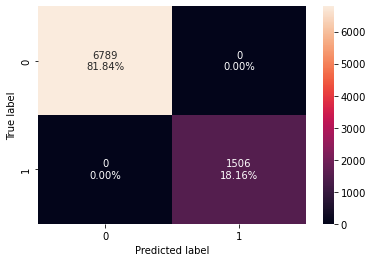

In [60]:
confusion_matrix_sklearn(rf, X_train, y_train) 

In [61]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train) ## Complete the code to check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


## Hyperparameter Tuning - Random Forest

In [57]:


# Define  classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Define the hyperparameter grid
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Create the scoring metric (e.g., F1 score)
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj.fit(X_train, y_train)

# Get the best estimator
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=30,
                       oob_score=True, random_state=1)

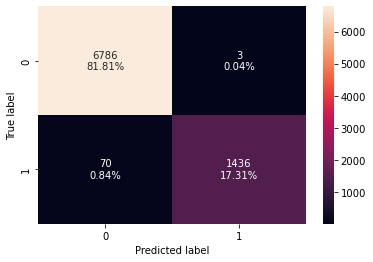

In [62]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) 

In [63]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned,X_train, y_train) 
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.9912,0.953519,0.997915,0.975212


## Decision Tree - Model Building and Hyperparameter Tuning 

### Decision Tree Model 

In [19]:
model = DecisionTreeClassifier(criterion='gini',random_state=1) 
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

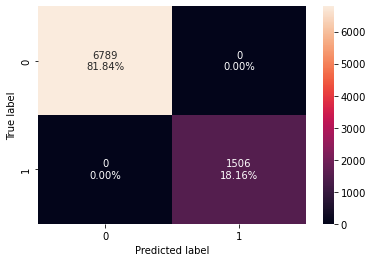

In [20]:
confusion_matrix_sklearn(model, X_train, y_train) 

In [21]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train, y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


## Hyperparameter Tuning - Decision Tree 

In [44]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, scoring=acc_scorer, cv=5) 
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [23]:
decision_tree_perf_train = model_performance_classification_sklearn(model,X_train, y_train) ## Complete the code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


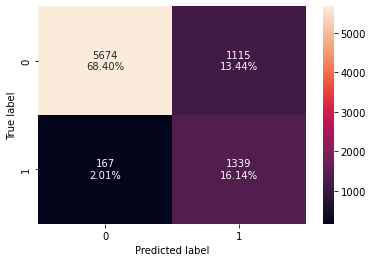

In [93]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [94]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.845449,0.88911,0.54564,0.676263


# Bagging - Model Building and Hyperparameter Tuning
### Bagging Classifier

In [24]:
bagging_classifier = BaggingClassifier(random_state=1) ## Complete the code to define bagging classifier with random state = 1
bagging_classifier.fit(X_train,y_train) ## Complete the code to fit bagging classifier on the train data

BaggingClassifier(random_state=1)

### Checking model performance on training set 

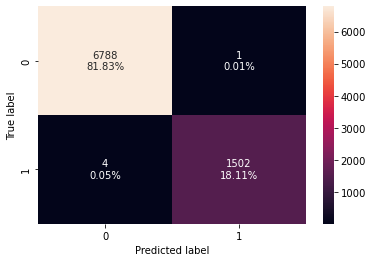

In [25]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [26]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_train, y_train) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999397,0.997344,0.999335,0.998338


### Checking model performance on test set

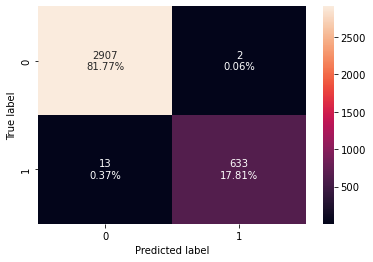

In [27]:

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [28]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier,X_test, y_test) ## Complete the code to check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995781,0.979876,0.99685,0.98829


### Hyperparameter Tuning - Bagging Classifier 

In [29]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on train data


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=1)

### Checking model performance on training set

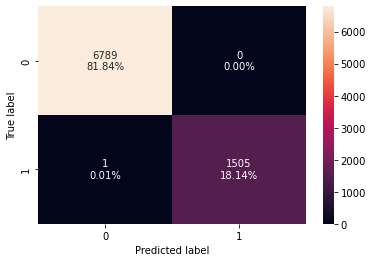

In [30]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [31]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999879,0.999336,1.0,0.999668


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the AdaBoost Classifier
ab_classifier = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost Classifier on the training data
ab_classifier.fit(X_train, y_train)


AdaBoostClassifier(random_state=1)

## Checking model performance on training set 

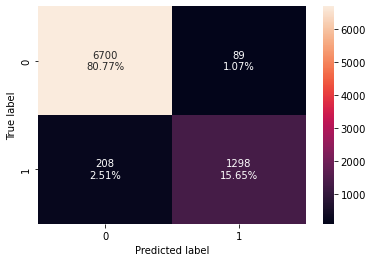

In [33]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [96]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.964195,0.861886,0.935833,0.897338


In [34]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.964195,0.861886,0.935833,0.897338


In [77]:

abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
   
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = abc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1) 
grid_obj = grid_obj.fit(X_train, y_train) 

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

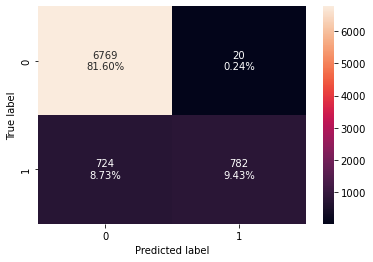

In [78]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [98]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) 
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.910307,0.519256,0.975062,0.677643


### Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=1)

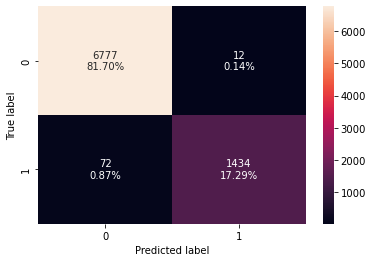

In [80]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [99]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.989873,0.952191,0.991701,0.971545


# 

In [82]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = gbc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.7)

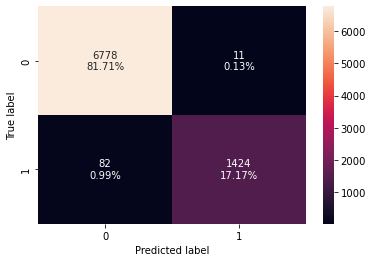

In [83]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [84]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) 
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.988788,0.945551,0.992334,0.968378


## XGBoost Classifier

In [85]:
from xgboost import XGBClassifier

# Define the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")

# Fit the XGBoost Classifier to the training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

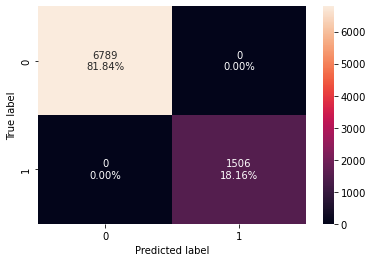

In [86]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [87]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train) 
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


## Hyperparameter Tuning - XGBoost Classifier

In [88]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05]
    
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator = gbc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.9)

In [102]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.989994,0.948871,0.995819,0.971778


## Stacking Classifier

In [89]:
from sklearn.ensemble import StackingClassifier

# Define the base estimators and the final estimator
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fit the Stacking Classifier on the train data
stacking_classifier.fit(X_train, y_train)  # Replace X_train and y_train with your actual data


StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=3,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                              max_features=0.8,
                                                              random_state=1,
                                                              subsample=0.9))

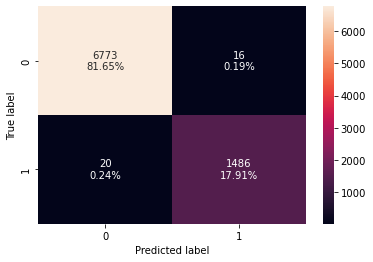

In [90]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [101]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train) 
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99566,0.98672,0.989348,0.988032


## Model Performance Comparison and Final Model Selection

In [103]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.845449,0.995781,0.964195,1.0,0.991200,0.964195,0.910307,0.989873,0.988788,1.0,0.989994,0.995660
Recall,1.0,0.889110,0.979876,0.861886,1.0,0.953519,0.861886,0.519256,0.952191,0.945551,1.0,0.948871,0.986720
Precision,1.0,0.545640,0.996850,0.935833,1.0,0.997915,0.935833,0.975062,0.991701,0.992334,1.0,0.995819,0.989348
F1,1.0,0.676263,0.988290,0.897338,1.0,0.975212,0.897338,0.677643,0.971545,0.968378,1.0,0.971778,0.988032


## Important features of the final model

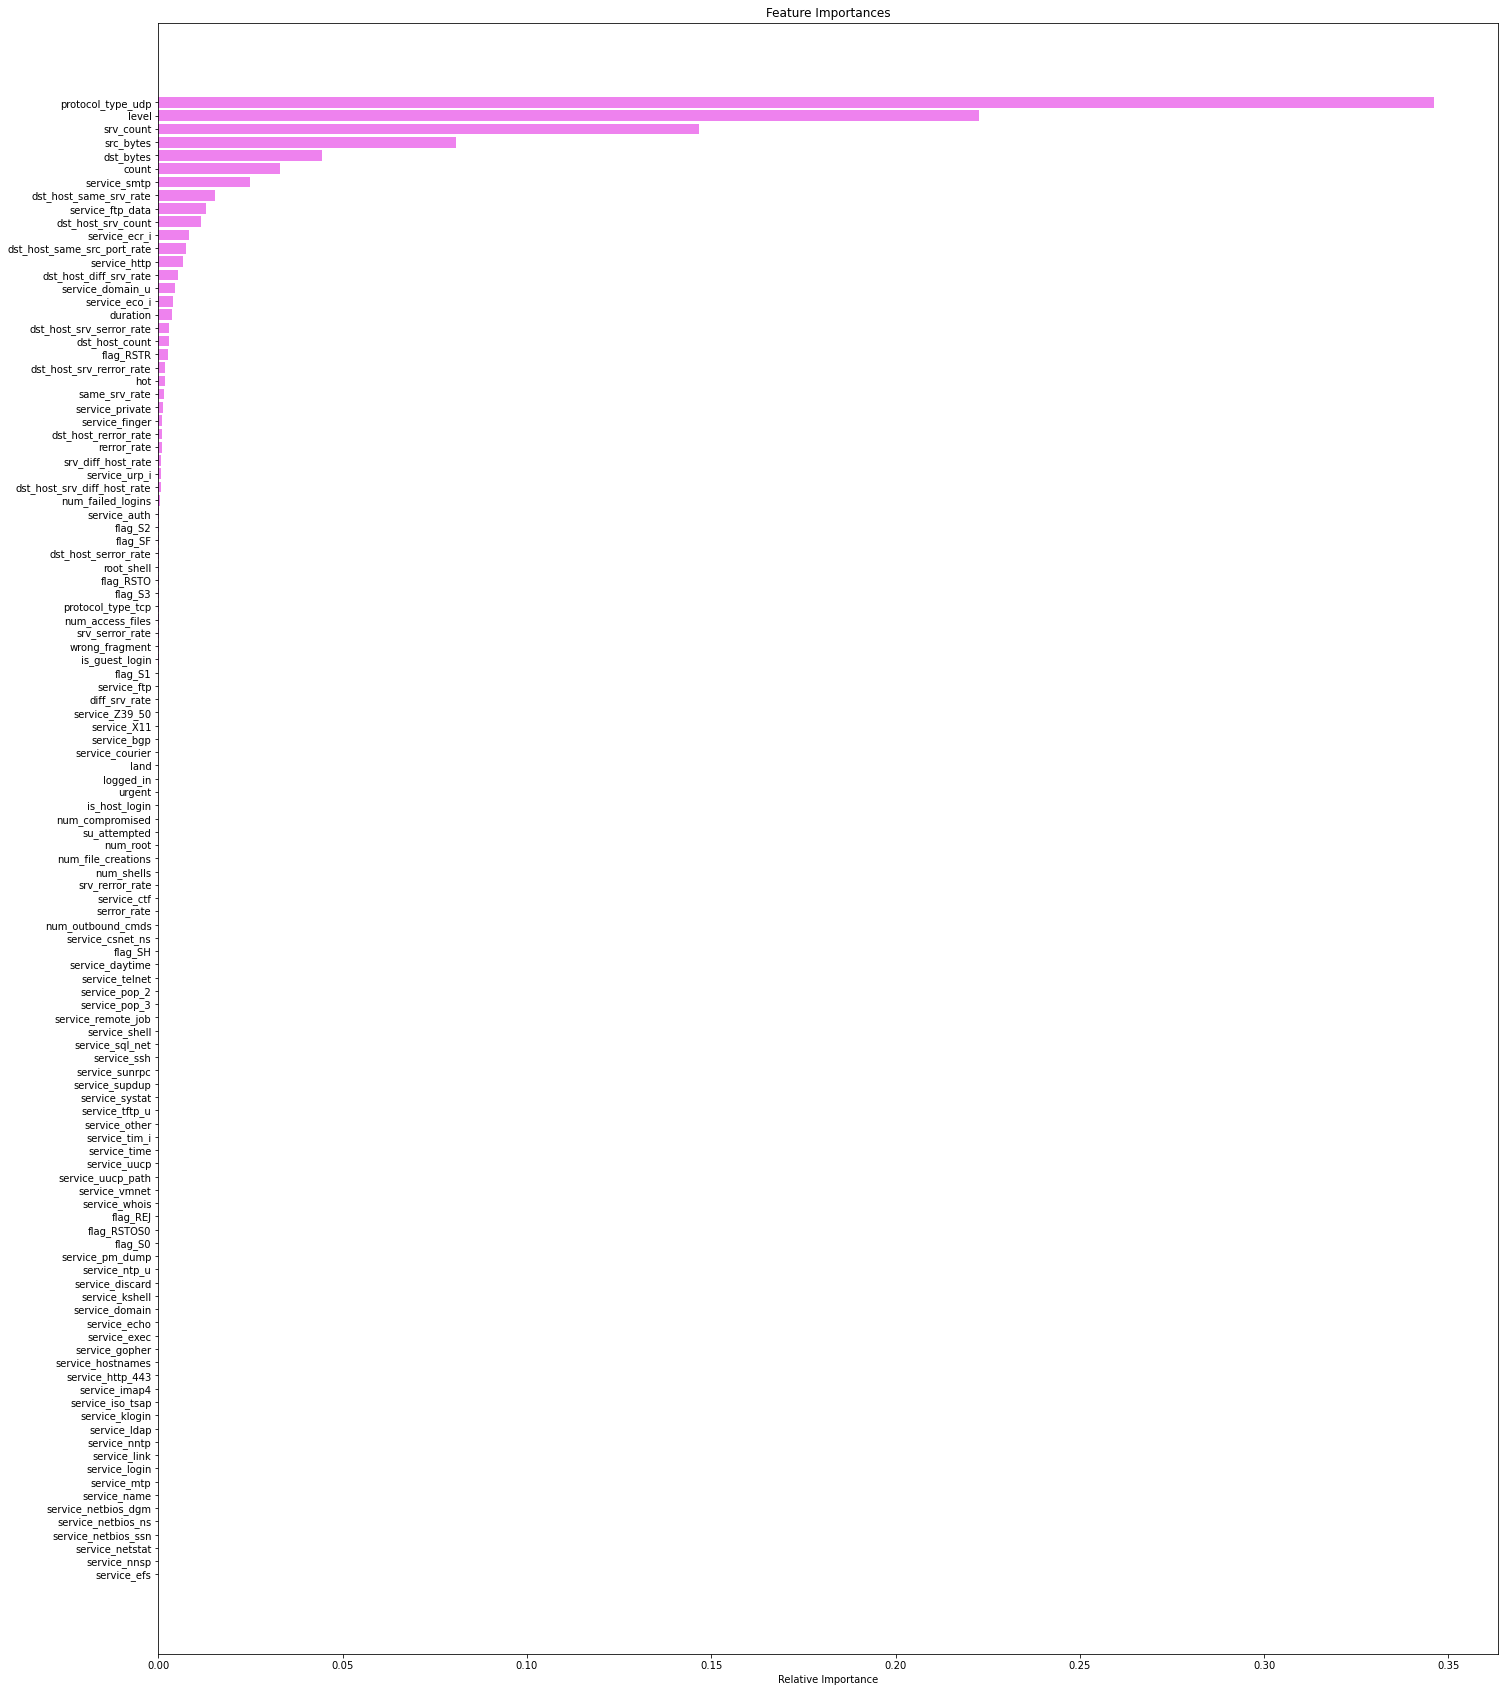

In [108]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(24, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
#fig.set_figwidth(10)
#fig.set_figheight(6)
#fig.set_dpi(142)
plt.show()